**CrispDM**

1.Business Understanding

2.Data Understanding

3.Data Preparation

4.Modeling

5.Evaluation

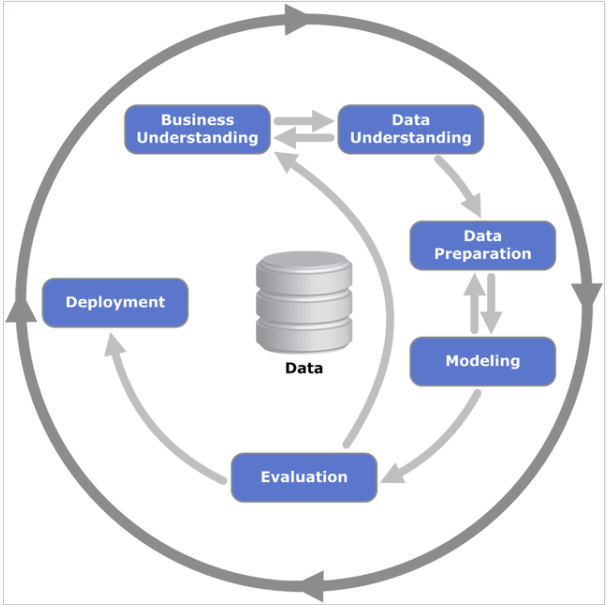

# 1.Business unserstanding
Most of this stage happaned when we read the articles and research for information about the stock prediction in the web.
The main conclusion of this stage was that daily prediction is the most common prediction at this area.
At this point in time we decided to predict the daily close values of stock using the previous day's data.


# 2.Data Understanding
At this stage we first load the data from our data set and started to explore and understand it. The data contain 6 main columns, each one of them refer to the value at the end of the trading day.

1.Close

2.Adjusted Close

3.Volume

4.high

5.low

6.open

In [16]:
import numpy as np 
import pandas as pd 
import datetime as dt

"""
helper function to better understand every operation we are apply
"""
def apply_func(function,stocks):
    for s in stocks:
        function(s.tail(10))
'''
function to load stock data from the path
'''
def load_stock(name,path):
    df = pd.read_csv("../input/stock-market-data/stock_market_data/{}/csv/{}.csv".format(path,name))
    return df


'''
we chosed to examine 5 popular stocks from usa main stock market(NYSE)
1.American Airlines
2.Ebay
3.General Electric
4.Amazon
5.Bank of America
'''
names=[("AAL","nasdaq"),("EBAY","sp500"),("GE","nyse"),("AMZN","sp500"),("BA","sp500")]
stocks=[load_stock(n[0],n[1])for n in names]

apply_func(print,stocks)
df=stocks[0]

            Date        Low       Open    Volume       High      Close  \
4115  01-02-2022  16.410000  16.559999  30798800  16.969999  16.830000   
4116  02-02-2022  16.490000  16.879999  37904200  17.150000  16.959999   
4117  03-02-2022  16.549999  16.650000  30642800  17.180000  16.570000   
4118  04-02-2022  16.040001  16.540001  38485800  16.570000  16.450001   
4119  07-02-2022  16.639999  16.690001  52927500  17.510000  17.280001   
4120  08-02-2022  17.209999  17.400000  46702500  18.280001  18.260000   
4121  09-02-2022  18.350000  18.450001  42407300  18.969999  18.760000   
4122  10-02-2022  18.350000  18.420000  36411800  19.080000  18.709999   
4123  11-02-2022  17.440001  18.590000  50162700  18.980000  17.610001   
4124  14-02-2022  17.615000  17.850000  18043518  18.305000  17.860001   

      Adjusted Close  
4115       16.830000  
4116       16.959999  
4117       16.570000  
4118       16.450001  
4119       17.280001  
4120       18.260000  
4121       18.760000  
4

# checks the data , number of rows and if its contains null values

In [17]:
for i,stock in enumerate(stocks):
    print(names[i][0])
    print(stock.info())
    print(stock.isnull().sum())
    print(stock.describe())

"""
before feature creation there is no null values and the data is pretty clean.
"""

AAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4125 entries, 0 to 4124
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4125 non-null   object 
 1   Low             4125 non-null   float64
 2   Open            4125 non-null   float64
 3   Volume          4125 non-null   int64  
 4   High            4125 non-null   float64
 5   Close           4125 non-null   float64
 6   Adjusted Close  4125 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 225.7+ KB
None
Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64
               Low         Open        Volume         High        Close  \
count  4125.000000  4125.000000  4.125000e+03  4125.000000  4125.000000   
mean     25.456828    25.962613  1.332169e+07    26.438067    25.935045   
std      15.921890    16.120065  2.177

'\nbefore feature creation there is no null values and the data is pretty clean.\n'

**Most of columns contain float type, there is one column who contain interger type(volume, because is cant be negative)**

**the date col is string so we need to convert it to date type, we will do it at the data preparation stage**

# 3.Data preparation



# Feature creation
**One of the most important and intersting part. at this stage we add to think outside the box and to help the prediction with some information that we create using few other features.**



In [18]:
ma_days = [7,10,14,21,50,100]
maxi_days=[7,30,365,730]
# create features that calulates moving average, maximum values for n days, ,minimum values for n days, std of last 7 days

"""
average for x days
""" 
def calculate_average(df,ma_days):
    for ma in ma_days:
        column_name = "MA for %s days" %(str(ma))
        df.loc[:,column_name]=pd.DataFrame.rolling(df['Close'],ma).mean()
        
"""
maximum for x days
""" 
def calculate_maximum(df,ma_days):
    for ma in maxi_days:
        column_name = "Maximum for %s days" %(str(ma))
        df.loc[:,column_name]=pd.DataFrame.rolling(df['Close'],ma).max()
"""
minimum for x days
""" 
def calculate_minimum(df,ma_days):
    for ma in maxi_days:
        column_name = "Minimum for %s days" %(str(ma))
        df.loc[:,column_name]=pd.DataFrame.rolling(df['Close'],ma).min()

calculate_average(df,ma_days)
calculate_maximum(df,maxi_days)
calculate_minimum(df,maxi_days)
df.loc[:,"std for 7 days"]=pd.DataFrame.rolling(df['Close'],7).std()
#add difference high-low daily feature
df.loc[:,'Diff High Low']=df['High']-df['Low']
#add diff open-close feature
df.loc[:,'Diff Open Close']=df['Open']-df['Close']
df.loc[:,'Daily Return'] = df['Close'].pct_change()*100

print("number of features {}".format(len(df.columns)))
df.columns


number of features 25


Index(['Date', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close',
       'MA for 7 days', 'MA for 10 days', 'MA for 14 days', 'MA for 21 days',
       'MA for 50 days', 'MA for 100 days', 'Maximum for 7 days',
       'Maximum for 30 days', 'Maximum for 365 days', 'Maximum for 730 days',
       'Minimum for 7 days', 'Minimum for 30 days', 'Minimum for 365 days',
       'Minimum for 730 days', 'std for 7 days', 'Diff High Low',
       'Diff Open Close', 'Daily Return'],
      dtype='object')

# Normalization the dataset with min-max scalar
**we wil examine the models with and without normalization**

In [19]:
from sklearn.preprocessing import MinMaxScaler
def normalize(df):
    scaler = MinMaxScaler(feature_range=(0,1))
    df = scaler.fit_transform(df)
    df=pd.DataFrame(df)
    return df

**convert the date string to date_time type and convert the index to date**

In [20]:
"""
we decided to chose the last 6 years for the data set. 
That decision was made Based on articles that we read and empirical  tests.
"""

for index,stock in enumerate(stocks):
    stock['Date'] = pd.to_datetime(stock['Date'],dayfirst=True)
    start_date=pd.to_datetime("01/01/2016")
    end_date=pd.to_datetime("01/01/2022")
    stock = stock[(stock["Date"] >= start_date) & (stock["Date"] <= end_date)]
    stock.set_index('Date', inplace=True)
    stocks[index]=stock
df=stocks[0]

**delete null values and replace them with average, prepare the df for feature selection and prediction**


In [21]:
y = df['Close'][1:] #target column -close value
df.loc[:,'Close previous']=df['Close']
df=df.drop(['Close'],axis=1)
df=df.drop(['Adjusted Close'],axis=1)
df=df.shift(periods=1)[1:]

# we decided not to normalize because the result's performance decreased 
# df=normalize(df)


# print(x_train.head(30))
print(df.isnull().sum())
print(y.isnull().sum)


Low                     0
Open                    0
Volume                  0
High                    0
MA for 7 days           0
MA for 10 days          0
MA for 14 days          0
MA for 21 days          0
MA for 50 days          0
MA for 100 days         0
Maximum for 7 days      0
Maximum for 30 days     0
Maximum for 365 days    0
Maximum for 730 days    0
Minimum for 7 days      0
Minimum for 30 days     0
Minimum for 365 days    0
Minimum for 730 days    0
std for 7 days          0
Diff High Low           0
Diff Open Close         0
Daily Return            0
Close previous          0
dtype: int64
<bound method NDFrame._add_numeric_operations.<locals>.sum of Date
2016-01-05    False
2016-01-06    False
2016-01-07    False
2016-01-08    False
2016-01-11    False
              ...  
2021-12-27    False
2021-12-28    False
2021-12-29    False
2021-12-30    False
2021-12-31    False
Name: Close, Length: 1510, dtype: bool>


'\nplotting the close value of each stock that we analyzed\n'

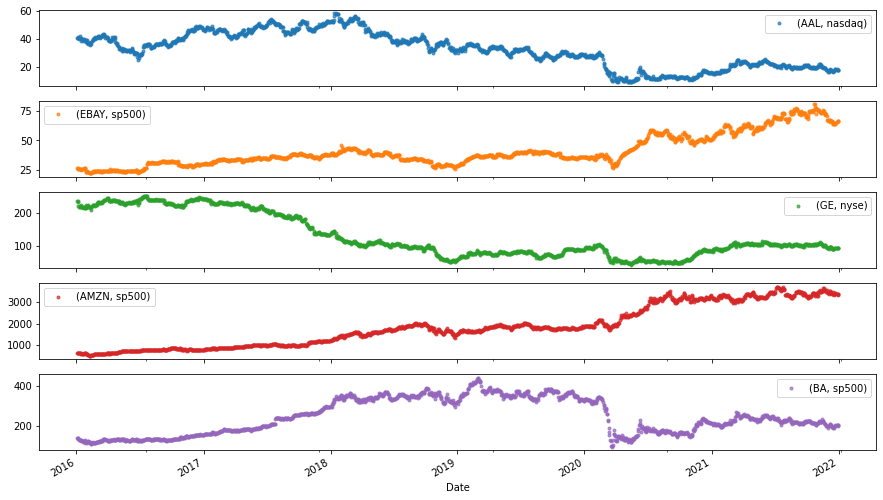

In [22]:
stocks_close=[stock["Close"] for stock in stocks]
close_show = pd.concat(stocks_close, axis=1, keys=names)
axes =close_show.plot(marker='.', alpha=0.7, linestyle='None', figsize=(15, 9), subplots=True)

"""
plotting the close value of each stock that we analyzed
"""

# split into test-train 

In [23]:
from sklearn.model_selection import train_test_split

'''
because our model is time series, shuffle must be false because every value depened on the previous one
'''

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.25, shuffle=False)

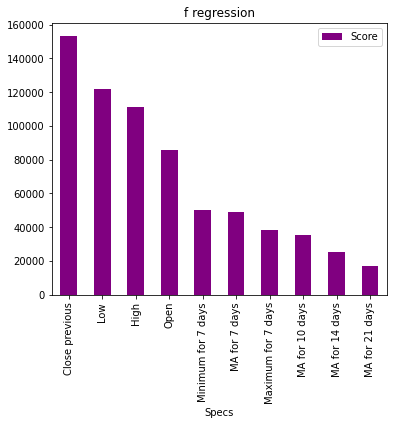

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                  Low       Open       High  Minimum for 7 days  \
Date                                                              
2016-01-05  40.299999  41.290001  41.349998           40.910000   
2016-01-06  39.950001  41.180000  41.490002           40.520000   
2016-01-07  40.000000  40.049999  41.700001           40.520000   
2016-01-08  39.680000  40.970001  41.520000           40.450001   
2016-01-11  40.259998  40.939999  41.360001           40.369999   
...               ...        ...        ...                 ...   
2020-06-26  12.180000  12.530000  13.240000           13.040000   
2020-06-29  12.130000  13.200000  13.290000           12.380000   
2020-06-30  12.020000  12.570000  13.510000           12.380000   
2020-07-01  12.880000  13.100000  13.480000           12.380000   
2020-07-02  12.630000  13.480000  14.290000           12.380000   

            Close previous  
Date                        
2016-01-05       40.910000  
2016-01-06       40.520000  
2016-01-07  

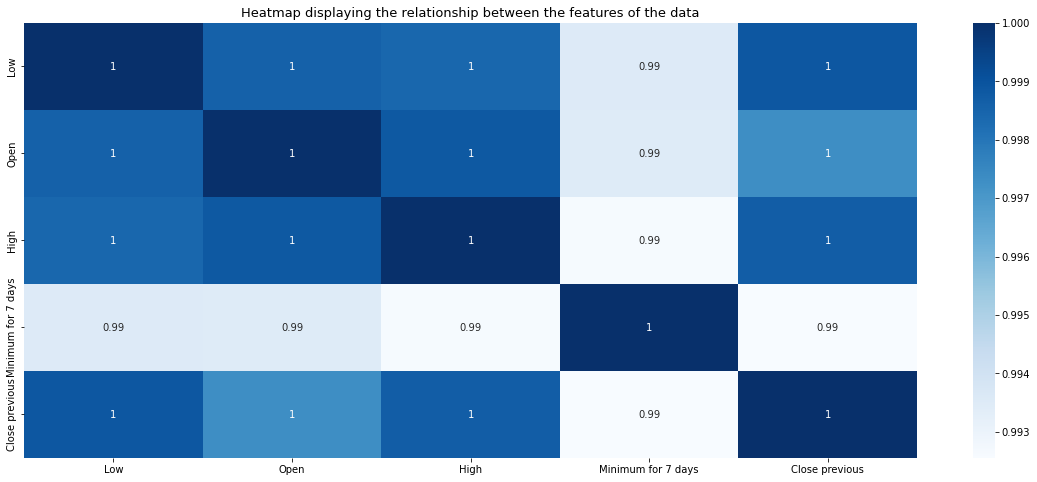

In [24]:
from sklearn.feature_selection import SelectKBest,f_classif,f_regression,mutual_info_regression

#feature selection for from train data!
import matplotlib.pyplot as plt
import seaborn as sns

##todo how much features to select for the model##
def select_k_features(func,k=8,x_train=x_train,y_train=y_train):
    #apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=func, k=5)
    fit = bestfeatures.fit(x_train,y_train)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(x_train.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    featureScores.nlargest(10,'Score').plot.bar(x="Specs",y="Score",figsize=(6,5),color="purple")
    plt.title("f regression")
    plt.show()
    best_10=list(featureScores.nlargest(5,'Score')['Specs'])
    for col in x_train:
        if col not in best_10:
            x_train.drop([col], axis=1, inplace=True)
    return x_train

x_train=select_k_features(func=f_regression)

print(x_train)
x_test=x_test[x_train.columns]
x_train.columns

plt.figure(figsize=(20,8))
sns.heatmap(x_train.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

In [25]:
import sklearn.metrics
import math
from sklearn.model_selection import TimeSeriesSplit

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



def train_test_and_measure(model_name,model,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
        
    model=model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    mse = sklearn.metrics.mean_squared_error(y_test,prediction)
    rmse = math.sqrt(mse)
    MBE = np.mean(prediction - y_test)
    print("Test set MAPE: {} ".format(model_name), mean_absolute_percentage_error(y_test,prediction))
    print("Test set RMSE: {} ".format(model_name), rmse)
    print("Test set MBE: {} ".format(model_name), MBE)
    print("r^2: {} ".format(model.score(x_test,y_test)))
    plot_df_train=pd.DataFrame(y_train)
    plot_df=pd.DataFrame(y_test)
    plot_df["predictions"]=prediction
    print(plot_df[-5:])
    plt.figure(figsize=(18,5))
    plt.plot(plot_df_train[-360:])
    plt.plot(plot_df)
    plt.show()    
    plot_df=pd.DataFrame(y_test)
    plot_df["predictions"]=prediction
    plot_df[-360:].plot(legend=True, figsize = (15, 8))
    plt.show()
    


# train linear regression model and measure the rmse, r squared,mape & mbe

In [26]:
import time
from datetime import datetime
import plotly_express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


# choose best hyper parameters

In [27]:
def mlp_model(X, Y):
    estimator=MLPRegressor(learning_rate_init=0.002)
    param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
              'activation': ['relu','tanh','logistic'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant','adaptive'],
              'solver': ['adam']}
    gsc = GridSearchCV(
        estimator,
        param_grid,
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X, Y)
    best_params = grid_result.best_params_
    print(best_params)
    return best_params

# 4.Modeling

In [28]:
from sklearn.neural_network import MLPRegressor

"""
create models:
1. Linear Regression
2.Random Forest Regresson
3.Support Vector Regression 
4.Gradient boosting regressor
5.Mlp Regressor
"""
regression_model = LinearRegression()
randomForestRegressor_model = RandomForestRegressor(max_depth=6, random_state=1)
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
gradientReg = GradientBoostingRegressor(random_state=0)
MLPRegressor=MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation='relu',  solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=300, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)



#notes
# randomForestRegressor_model = RandomForestRegressor(n_estimators=800,min_samples_split=10, min_samples_leaf=2, max_depth=None,bootstrap=False)
# mlp_model(x_train,y_train)
# {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
# MLPRegressor=MLPRegressor(hidden_layer_sizes=(200,), activation='tanh',  solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=300, shuffle=False, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
# MLPRegressor=MLPRegressor(hidden_layer_sizes=(100,), activation='logistic',  solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)





# 5.Fit and Evaluation 

Test set MAPE: regression_model  2.4761317417233983
Test set RMSE: regression_model  0.5698381521696683
Test set MBE: regression_model  0.010307274055197156
r^2: 0.9796705828154324 
                Close  predictions
Date                              
2021-12-27  18.170000    18.304254
2021-12-28  18.540001    18.208540
2021-12-29  18.049999    18.579915
2021-12-30  18.070000    18.096232
2021-12-31  17.959999    18.172054


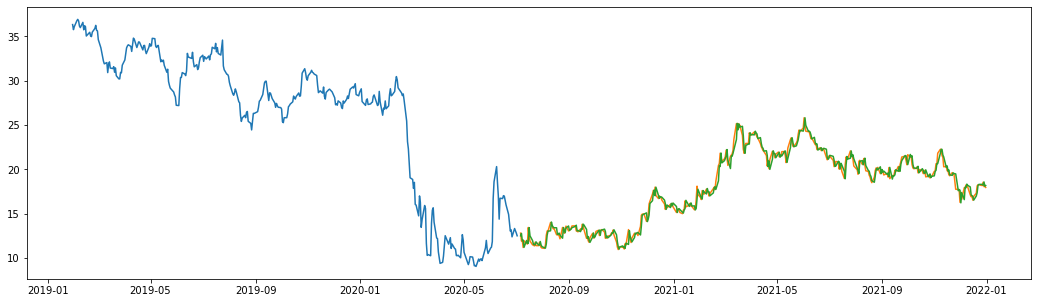

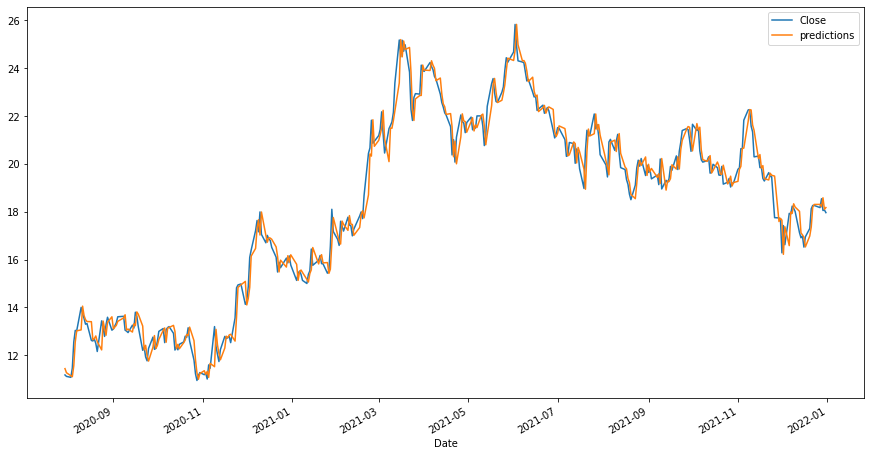

Test set MAPE: randomForestRegressor_model  5.937825792157835
Test set RMSE: randomForestRegressor_model  1.3208810789035383
Test set MBE: randomForestRegressor_model  -0.892571924592177
r^2: 0.8907681421363595 
                Close  predictions
Date                              
2021-12-27  18.170000    17.024601
2021-12-28  18.540001    16.898646
2021-12-29  18.049999    16.911241
2021-12-30  18.070000    17.074082
2021-12-31  17.959999    16.943182


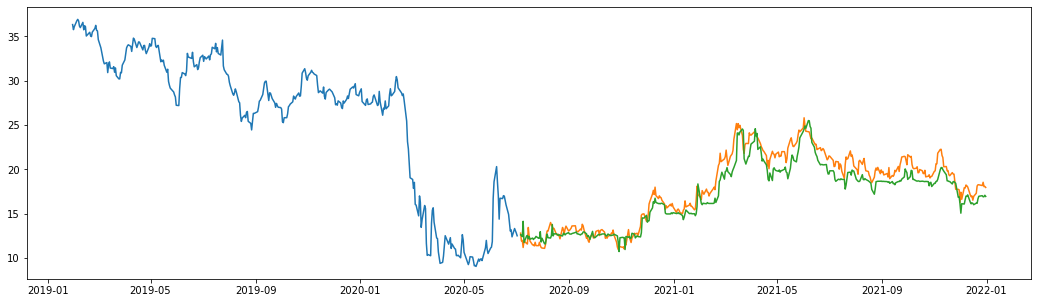

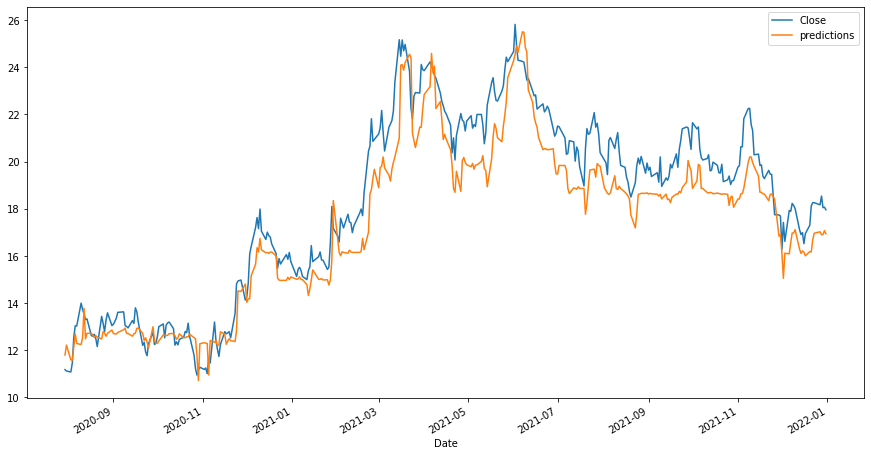

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



Test set MAPE: MLPRegressor  2.7290348429977276
Test set RMSE: MLPRegressor  0.6177541465905352
Test set MBE: MLPRegressor  0.06338332031688548
r^2: 0.9761079606923342 
                Close  predictions
Date                              
2021-12-27  18.170000    18.293085
2021-12-28  18.540001    17.921279
2021-12-29  18.049999    18.306051
2021-12-30  18.070000    18.244671
2021-12-31  17.959999    18.297781


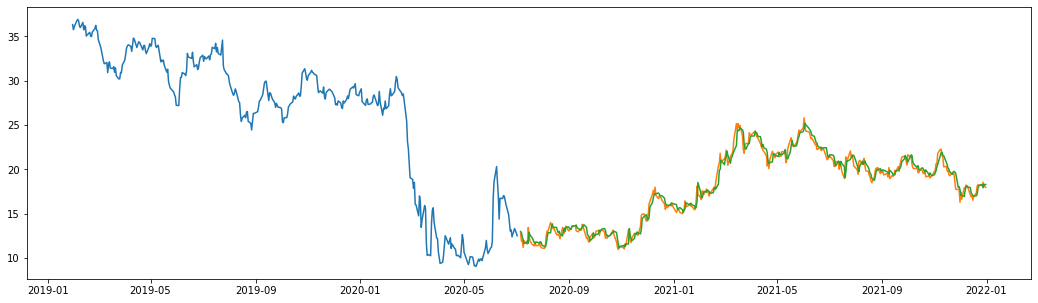

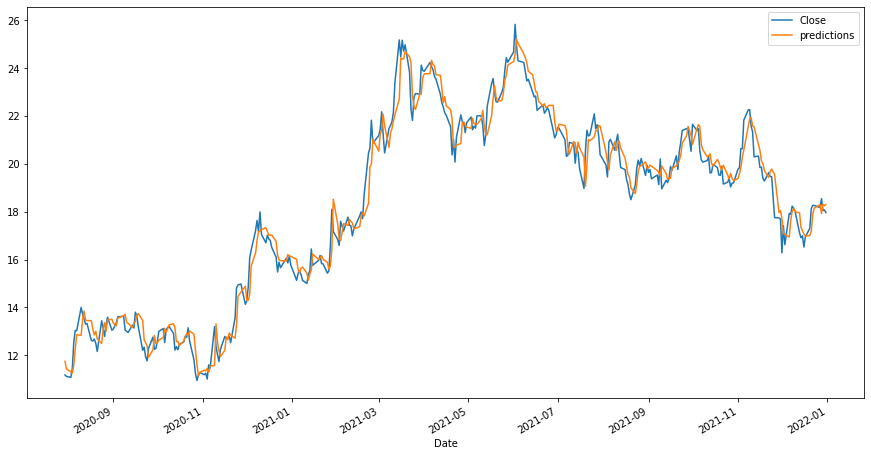

Test set MAPE: SVR_model  3.4618841323564555
Test set RMSE: SVR_model  0.7598118777963088
Test set MBE: SVR_model  -0.12712296799640313
r^2: 0.9638561809832119 
                Close  predictions
Date                              
2021-12-27  18.170000    17.998691
2021-12-28  18.540001    17.500899
2021-12-29  18.049999    17.978101
2021-12-30  18.070000    17.918435
2021-12-31  17.959999    17.994058


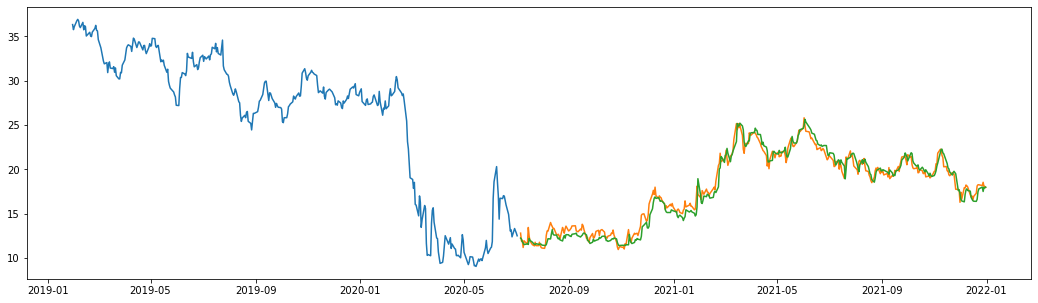

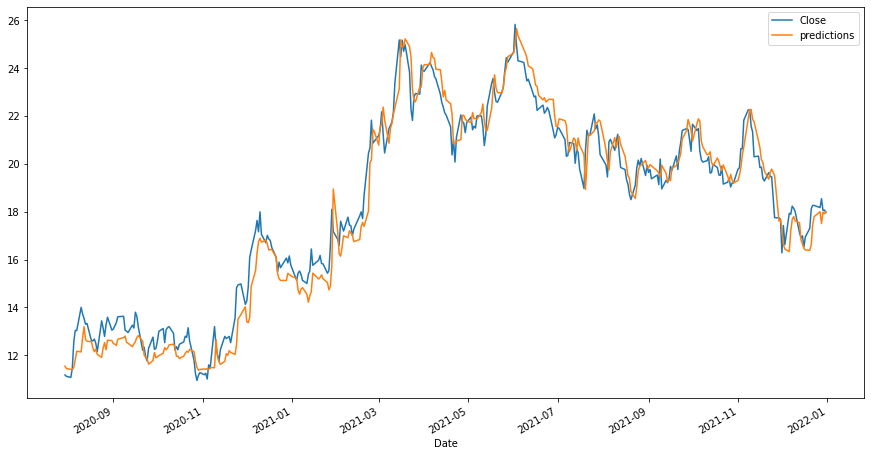

Test set MAPE: gradientReg_model  5.487632248770383
Test set RMSE: gradientReg_model  1.2890788197847793
Test set MBE: gradientReg_model  -0.8920802127859104
r^2: 0.8959646751237421 
                Close  predictions
Date                              
2021-12-27  18.170000    16.663878
2021-12-28  18.540001    16.844689
2021-12-29  18.049999    16.663878
2021-12-30  18.070000    16.844689
2021-12-31  17.959999    16.844689


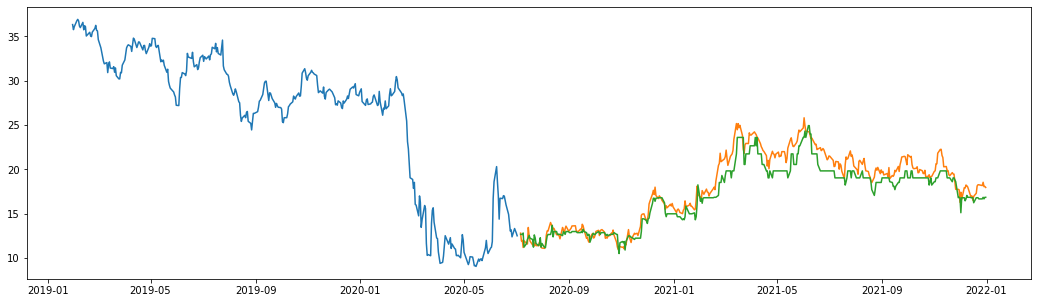

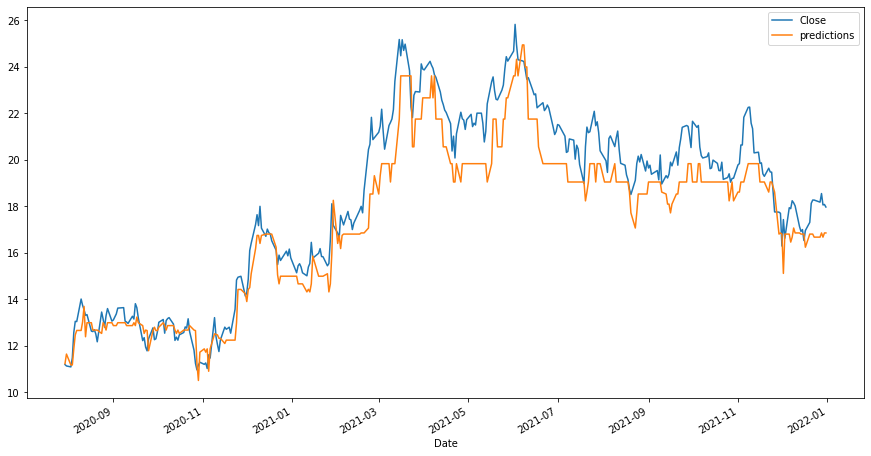

In [29]:
train_test_and_measure("regression_model",regression_model)
train_test_and_measure("randomForestRegressor_model",randomForestRegressor_model)
train_test_and_measure("MLPRegressor",MLPRegressor)
train_test_and_measure("SVR_model",svr)
train_test_and_measure("gradientReg_model",gradientReg)


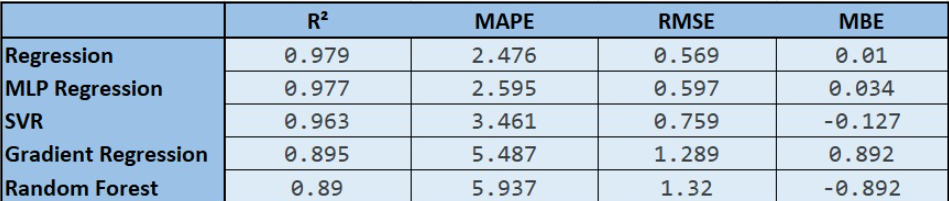

# use time-series split to train-test
**checks if it bring us insights about the split method and if we want to change it to this one**

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

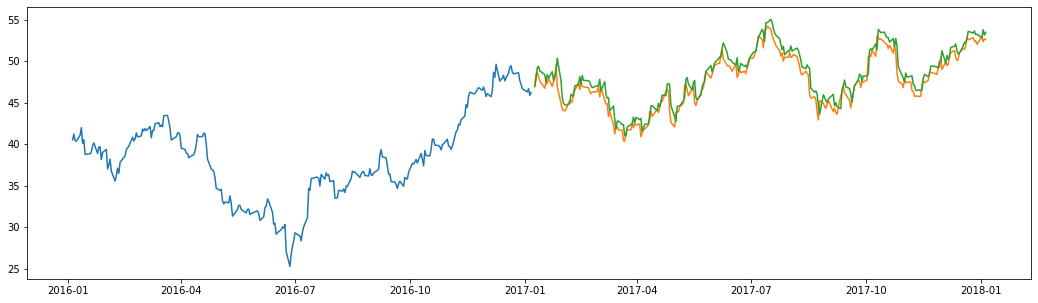

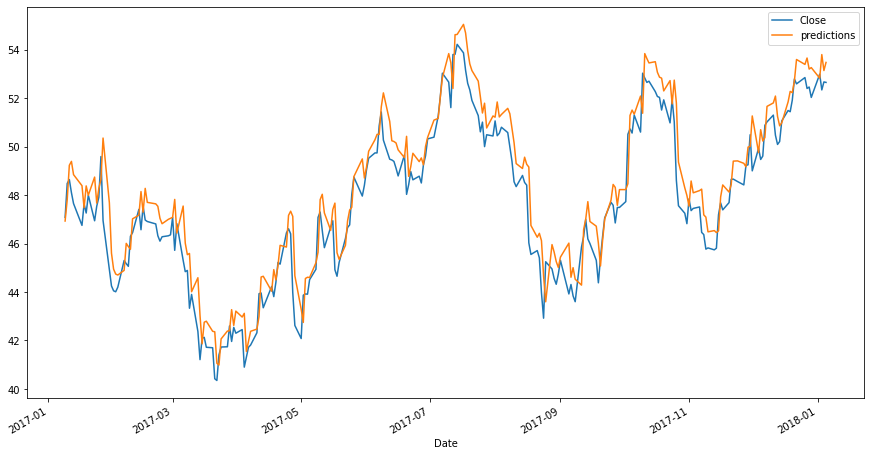

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

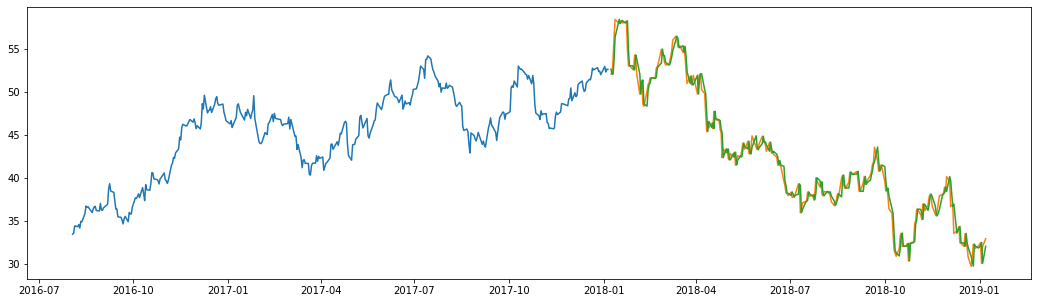

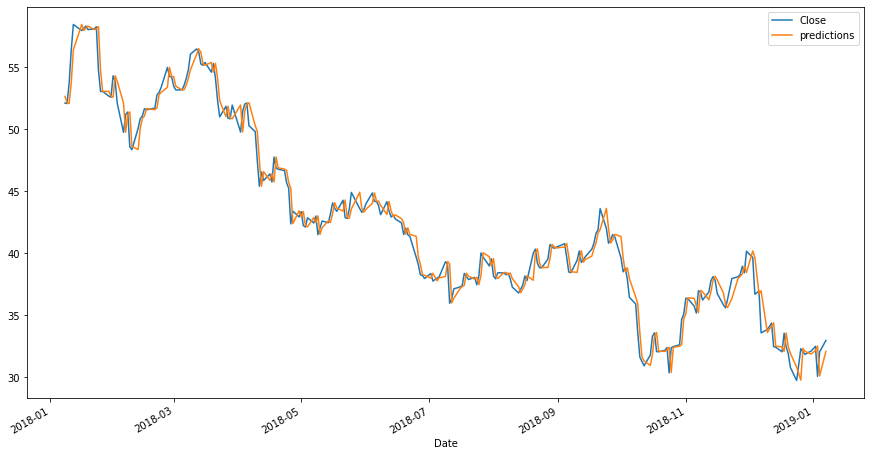

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

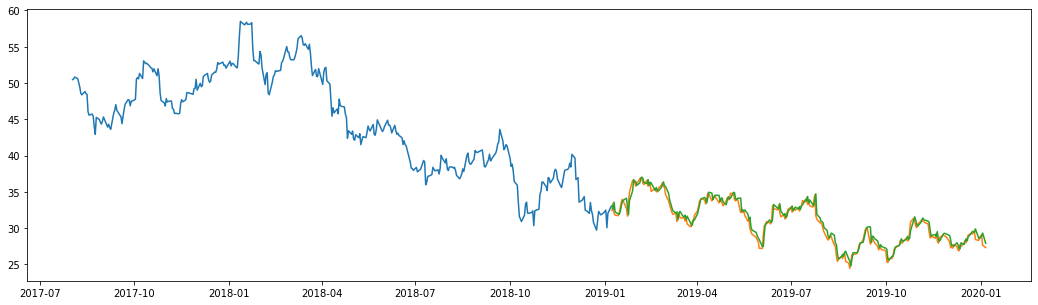

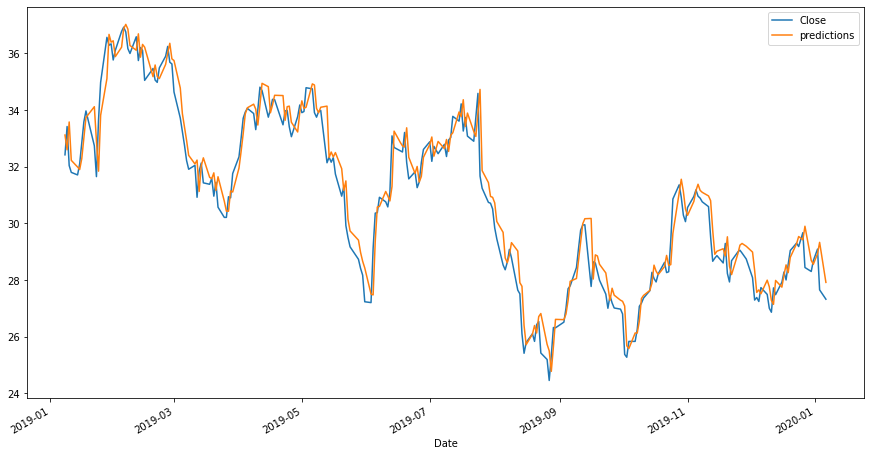

TRAIN: [   0    1    2 ... 1005 1006 1007] TEST: [1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021
 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035
 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049
 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063
 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077
 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091
 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105
 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119
 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133
 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147
 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161
 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175
 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189
 1190 1191 1192 1193 1194 11

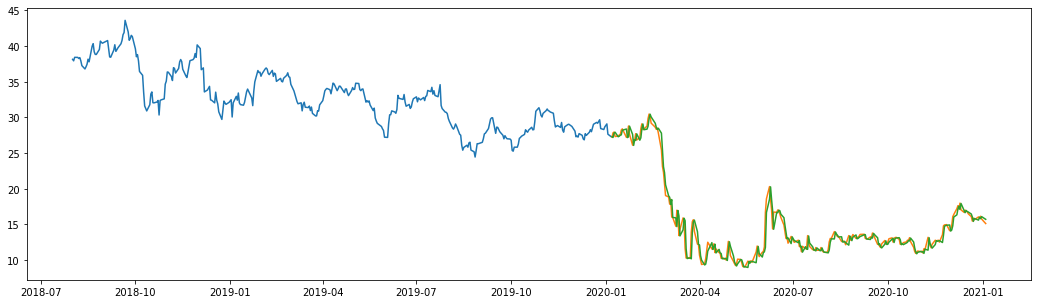

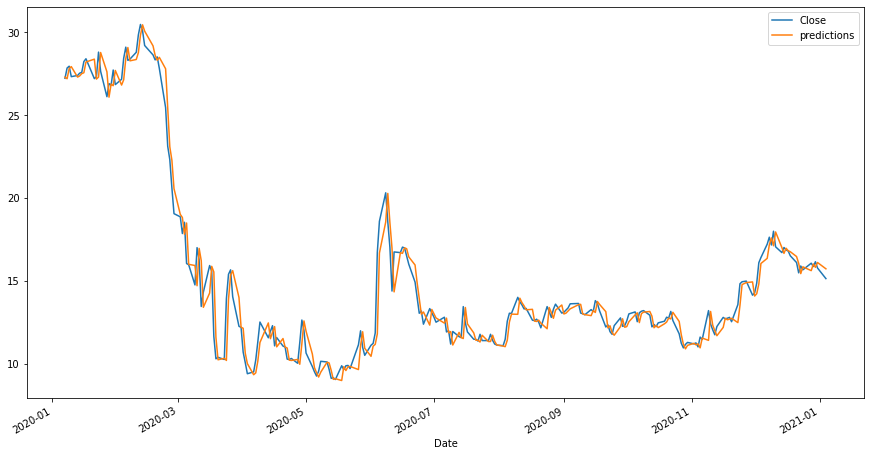

TRAIN: [   0    1    2 ... 1256 1257 1258] TEST: [1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272
 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285 1286
 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299 1300
 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314
 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328
 1329 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341 1342
 1343 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355 1356
 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370
 1371 1372 1373 1374 1375 1376 1377 1378 1379 1380 1381 1382 1383 1384
 1385 1386 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398
 1399 1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412
 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426
 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440
 1441 1442 1443 1444 1445 14

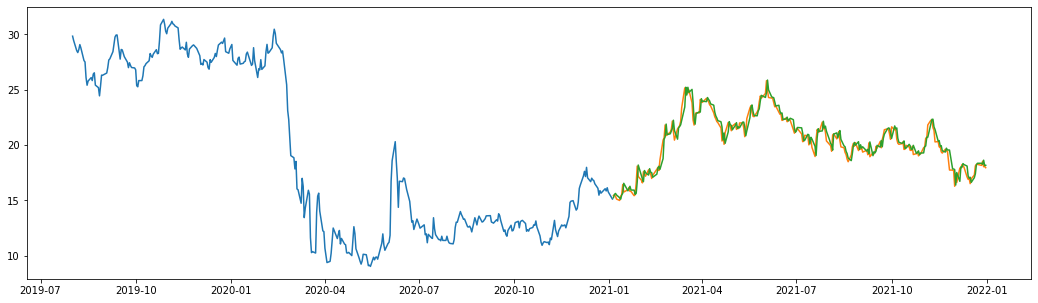

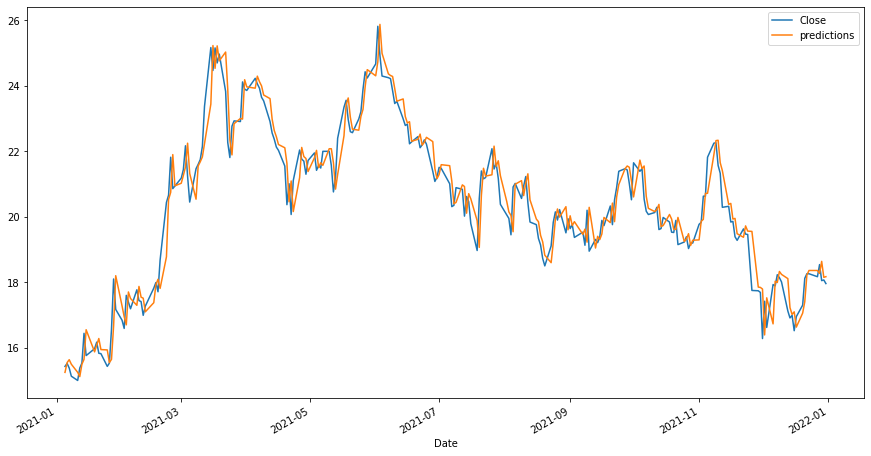

In [30]:
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(df):
    df=df[['Close previous']]
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = df.loc[df.index[train_index]], df.loc[df.index[test_index]]
    y_train, y_test = y.loc[y.index[train_index]], y.loc[y.index[test_index]]
    print(y_train)
    train_test_and_measure("MLPRegressor_model",MLPRegressor,x_train,x_test,y_train,y_test)

# The results of 5 stocks excutions with Linear Regression and MLP Regression

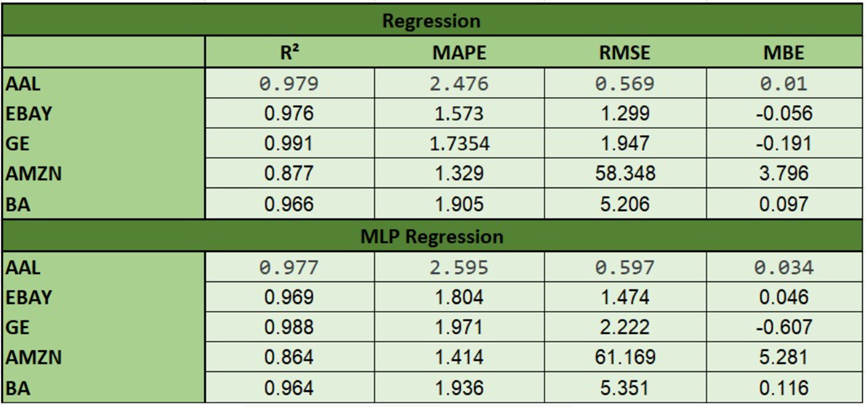